<font size=5  color=#003366> <b>[LELEC2900] - Signal Processing <br><br> 
Python02 - Multirate systems</b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. L. Vandendorpe<br>
Prof. L. Jacques
<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
Florian Quatresooz (florian.quatresooz@uclouvain.be) <br>
<br><br>
</font>

<font size=5 color=#009999> <b>1. Decimation and interpolation </b> </font> <br> <br>

<font size=5 color=#009999> <i>1.1 Gentle reminder</i> </font>


Multirate systems are fundamental in the design of modern signal processing techniques. In order to design such systems, one must be able to convert signals at higher or lower sample rates. With this aim in view, the concepts of interpolation and decimation have been addressed during the lectures: 


- <b>Interpolation</b> is used for converting a signal at a higher sample rate. The basic implementation of an interpolation filter (of factor $I$) consists in two successive steps:
    - inserting $I-1$ zeros between the samples of the original signal
    - Applying a low-pass filter on the signal.

    <img src="Imgs/image_4.png" width = "400">

- <b>Decimation</b> is used for converting a signal at a lower sample rate. The basic implementation of a decimation filter (of factor $D$) consists in two successive steps:

    - applying a low pass filter on the original signal (to avoid aliasing).
    - removing $D-1$ samples for every block of $D$ succesive samples.

    <img src="Imgs/image_5.png" width = "400">
    <br>
    
<font size=5 color=#009999> <i>1.2 Generate a sine wave</i> </font>

The objective of this exercise is to apply the operations of decimation and interpolation on a simple sine function, and to observe their effects in the spectral domain.

These operations of decimation and interpolation will be performed in three manners: 

<ol>
   <li> By applying the standard definitions of these operations (without using polyphase components).
   <li>By implementing polyphase components.
   <li> Using the built in function <samp>signal.resample_poly<samp>.
</ol>   
We consider a continuous sine function of unit amplitude and with a frequency of $100$ Hz. This function is corrupted by a zero mean Gaussian noise of variance $0.05$. One records noisy measurements of this signal during $0.04$ seconds with a sampling frequency of $10^4$ Hz. Generate a vector x containing these measured values. Plot the resulting sequence in the time domain as well as its DFT (in magnitude).

In [1]:
#---------------------------------------------------------------------------
#TO RUN
#We provide you two funtions to plot a time signal (with/without its DFT) in
#the make_graphs file. Open the file to read the function's description if 
#you want to use them.
#---------------------------------------------------------------------------

%load_ext autoreload
%autoreload 2
from make_graphs import *
import numpy as np   
from scipy import signal as signal
import cmath as math

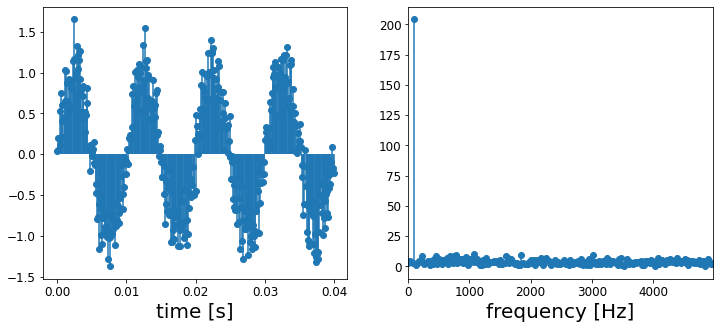

In [2]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------
f = 100 # Hz
fs = 1e4 # Hz
A = 1
N = int(0.04*fs)

t = np.arange(0, 0.04, 1/fs)
sine = A*np.sin(2*np.pi*f*t) + np.random.normal(0, np.sqrt(0.05), size=len(t))

fft = np.fft.fft(sine)
fftfreq = np.fft.fftfreq(len(sine), d=1/fs)

plotSignalAndDft(t, sine, fftfreq, np.abs(fft), x_label=['time [s]','frequency [Hz]'], y_label=['',''], discrete=[True, True])

<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>

<b>Original sine wave and DFT</b>  <br>
<img src="FeedbackImgs/1-2_fig1.png" width = "600">
</div>

<font size=5 color=#009999> <i>1.3 Standard decimation and interpolation</i> </font>

In order to simplify the sinusoidal storage or transmission, we decimate signal $x$ by $M=10$, after performing a proper lowpass filtering to minimize aliasing distortion. 

Since digital filters have not been covered yet in this course, the low-pass filter that we will implement here is arbitrarily chosen. We here select a moving average filter of order 20 since this filter is easy to implement.
As a reminder, the impulse response of a moving average filter of order $N$ is given by 
$$h[n] = \frac{1}{N}  ~\text{for}~ n = 0,...,N-1.$$

Since the impulse response of this filter is a rectangle, its Fourier transform is a cardinal sine, which can be used to perform the low pass filtering operation. 
    
Plot the decimated signal in the frequency domain as well as its DFT (in magnitude).


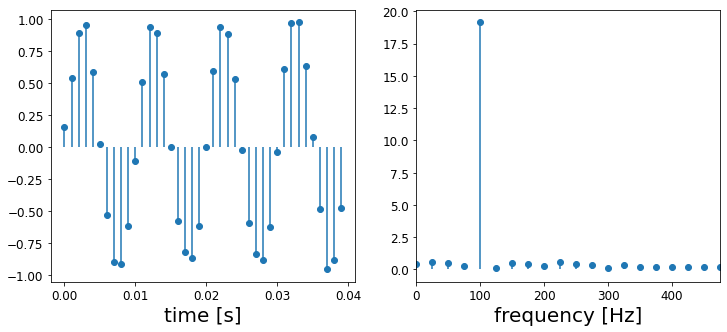

In [3]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------
N = 20
h = 1/N * np.ones(N)
y = np.convolve(sine, h, mode="same")

M = 10
y = y[::10]
ty = t[::10]

ffty = np.fft.fft(y)
fftfreqy = np.fft.fftfreq(len(y), M/fs)

plotSignalAndDft(ty, y, fftfreqy, np.abs(ffty), x_label=['time [s]','frequency [Hz]'], y_label=['',''], discrete=[True, True])

<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>

<b>Standard decimation</b>  <br>
<img src="FeedbackImgs/1-3_fig1.png" width = "600">
</div>

Expand the rate back to its original value by introducing $(M-1)$ zeros between each two consecutive subsamples.
   
Plot the resulting sequence in the time domain as well as its DFT (in magnitude).

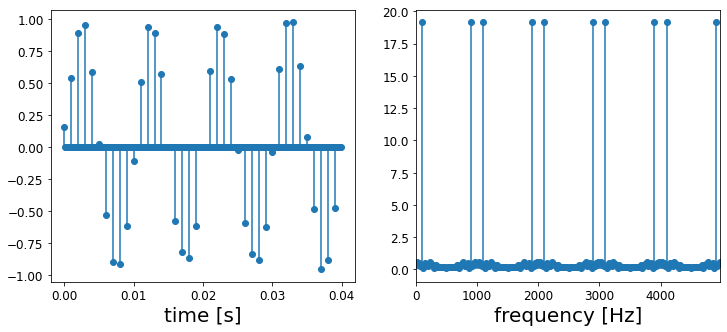

In [4]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------
ypad = np.zeros(len(y)*M)
ypad[::M] = y

fftypad = np.fft.fft(ypad)
fftfreqypad = np.fft.fftfreq(len(ypad), 1/fs)

plotSignalAndDft(t, ypad, fftfreqypad, np.abs(fftypad), x_label=['time [s]','frequency [Hz]'], y_label=['',''], discrete=[True, True])

<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>

<b>Standard interpolation</b>  <br>
<img src="FeedbackImgs/1-3_fig2.png" width = "600">
</div>

Remove the spectral repetitions induced by the inserted zeros by means of a low pass filter. Make use of a triangular filter of length $20$ (using the function <samp>signal.triang</samp>).

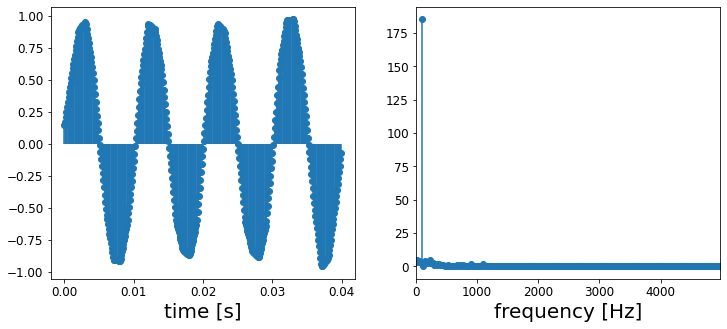

In [5]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------
triangle = signal.triang(20)
y_filtered = np.convolve(ypad, triangle, mode="same")

ffty_filtered = np.fft.fft(y_filtered)
fftfreqy_filt = np.fft.fftfreq(len(y_filtered), 1/fs)

plotSignalAndDft(t, y_filtered, fftfreqy_filt, np.abs(ffty_filtered), x_label=['time [s]','frequency [Hz]'], y_label=['',''], discrete=[True, True])

<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>

<b>Remove spectral repetitions</b>  <br>
<img src="FeedbackImgs/1-3_fig3.png" width = "600">
</div>

Compare the resulting signals with the original signal before decimation. What do you observe (in the time and frequency domains)?

<font size=5 color=#009999> <i>1.4 Decimation and interpolation using polyphase components</i> </font>

As explained in the slides of Lecture 3, it is possible to employ polyphase components to perform rate changing operations using less operations. Repeat the rate changing operations of the previous section using this approach.

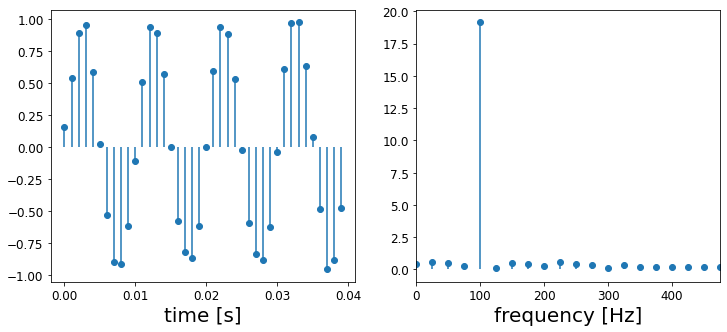

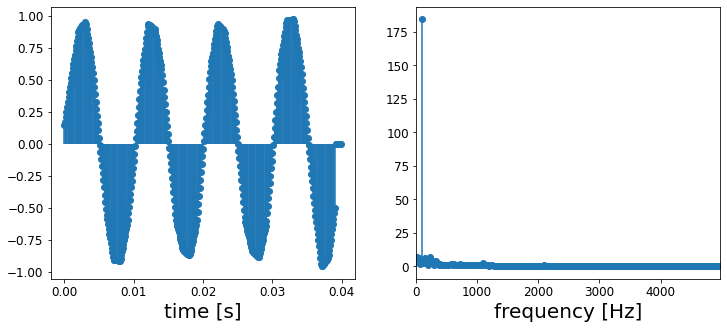

In [8]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------

# decimation
x_p = np.zeros((M, len(sine)//M))
h_p = np.zeros((M, len(h)//M))
z_p = np.zeros((M, len(sine)//M))

for k in range(M):
    x_p[k] = sine[k::M]
    h_p[k] = h[k::M]
    z_p[k] = np.convolve(x_p[k], h_p[k], mode="same")
    
z = np.sum(z_p, axis=0)

fftzp = np.fft.fft(z)
fftfreqzp = np.fft.fftfreq(len(z), M/fs)

plotSignalAndDft(t[::M], z, fftfreqzp, np.abs(fftzp), x_label=['time [s]','frequency [Hz]'], y_label=['',''], discrete=[True, True])

# interpolation
y_up = np.zeros((M, len(sine)))
y_filt = np.zeros((M, len(sine)//M))
y = np.zeros(len(sine))
h_tri_p = np.zeros((M,len(triangle)//M))

#pour le upsampling
for k in range(M) :
    h_tri_p[k] = triangle[k::M]
    y_filt[k] = np.convolve(z,h_tri_p[k], mode = 'same')
    y_up[k][::M] = y_filt[k]
    y[:-1] = y[1:] + y_up[k][:-1]
    

fftx_tilde = np.fft.fft(y)
fftfreqx_tilde = np.fft.fftfreq(len(y), 1/fs)

plotSignalAndDft(t, y, fftfreqx_tilde, np.abs(fftx_tilde), x_label=['time [s]','frequency [Hz]'], y_label=['',''], discrete=[True, True])


<div class="alert alert-warning">
<b>COMPLEMENTARY EXPLANATION</b>  <br>

In section 1.3, we applied sequentially a standard decimator operator and a standard interpolator operator. This process is depicted by the image below (both blocks are applied successively):<br>

<img src="FeedbackImgs/image_7b.png" width = "600"><br>

You can notice that both filters are applied on the original sampling rate. Objective of polyphase decomposition is providing a more efficient method for sampling rate conversion. <br><br>

First, let's consider a naïve extension of our standard decimation/interpolation with polyphase representation: 
<br>
<img src="FeedbackImgs/image_6.png" width = "600"><br>
The only difference from the process described above is that both the signal and the filters are delayed to compute the polyphase components. This is computationally expensive!<br><br>

We can handle this issue by inverting the order of filtering and decimation/interpolation operations:
<img src="FeedbackImgs/image_7.png" width = "600"><br>
Instead of using the (b) sequence, we will choose (a) in both cases because the filtering is done at the lower sampling rate.<br><br>

We then obtain the new <b>polyphase decimation system</b>: 
<img src="FeedbackImgs/image_8.png" width = "400"><br>
<ol>
    <li> Samples arrive at each polyphase filter at a rate of $1/M$ the original sampling rate.
    <li> Each subfilter has $N/M$ coefficients.
</ol>
And also the new <b>polyphase interpolation system</b>: 
<img src="FeedbackImgs/image_9.png" width = "400"><br>
<ol>
    <li> Samples arrive at each polyphase filter at the original sampling rate.
    <li> Each subfilter has $N/L$ coefficients.
</ol>
</div>


<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>

<b>Decimation using polyphase components</b>  <br>
<img src="FeedbackImgs/1-4_fig1.png" width = "600">
<br><br>
<b>Interpolation using polyphase components</b>  <br>
<img src="FeedbackImgs/1-4_fig2.png" width = "600">
</div>

<font size=5 color=#009999> <i>1.5 Decimation and interpolation using Python built in function</i> </font>

Repeat the rate-changing operations employed in the present experiment by using functions signal.resample_poly from scipy.  


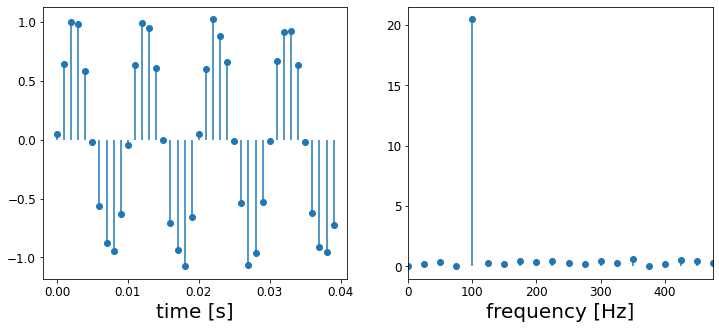

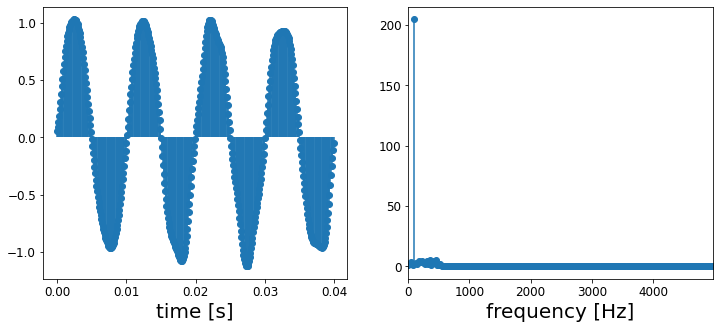

In [16]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------
# decimation
sine_poly = signal.resample_poly(sine, up=1, down=M)

fft_signaldown = np.fft.fft(sine_poly)
fftfreqdown = np.fft.fftfreq(len(sine_poly), M/fs)

plotSignalAndDft(t[::M], sine_poly, fftfreqdown, np.abs(fft_signaldown), x_label=['time [s]','frequency [Hz]'], y_label=['',''], discrete=[True, True])

# interpolation
sine_up_poly = signal.resample_poly(sine_poly, up=M, down=1)

fft_signalup = np.fft.fft(sine_up_poly)
fftfrequp = np.fft.fftfreq(len(sine_up_poly), 1/fs)

plotSignalAndDft(t, sine_up_poly, fftfrequp, np.abs(fft_signalup), x_label=['time [s]','frequency [Hz]'], y_label=['',''], discrete=[True, True])


<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>

<b>Signal obtained after successive decimation and interpolation buit-in python function relying on using polyphase components</b>  <br>
<img src="FeedbackImgs/1-5_fig1.png" width = "600">
</div>

Compare the recovered signals in time and frequency with those obtained in section A.

<font size=5 color=#009999> <b>2. Filter banks </b> </font> <br> <br>

In the framework of the following exercise, we introduce the concept of <b>filter bank</b> (see figure below).

A filter bank consists in an array of bandpass filters that separate an original signal $x[n]$ into $N$ subband signals $y_k[n]$. 
Each of these subband signals contains a specific portion of the spectrum of the original signal. <br>
The process of separating and modifying the subband signals is called <b>analysis</b>. <br>
The process of recombining the subband signals into one total output signal is called <b>synthesis</b>.

<img src="Imgs/image_1.png" width = "800"><br><br>

<font size=5 color=#009999> <i>2.1 Example of application </i> </font>

In practice, a filter bank can be used for instance to manipulate audio signals. In the analysis filter bank, the signal is first decomposed into different subband signals. These subbands signals $y_k[n]$ can then be modified (to become $\hat{y}_k[n]$). Possible modifications can include

- Downsampling
- Storage/transmission
- Filtering
- ...

In the case of audio signals, some frequencies are more important than others for the hearing. If the signal has to be stored in a memory for instance: 

- subband signals associated to frequencies that are less 'important' can be compressed at a lower resolution
- subband signals associated to frequencies that are more important can be compressed at a higher resolution

<br><br>
<font size=5 color=#009999> <i>2.2 Uniform filter bank </i> </font>

If the filters $H_k(e^{j\Omega})$ ($k=1,...,M-1$) are all shifted versions of a prototype filter $H_0(e^{j\Omega})$, the filter bank is called <b>uniform</b>. 

<img src="Imgs/image_2.png" width = "650">

In that case, it is possible to implement the entire filter bank by using the polyphase components $P_k$ of $H_0(e^{j\Omega})$ only.
The corresponding structure is represented in the figure below. 

<img src="Imgs/image_3.png" width ="500">

<br><br>
<font size=5 color=#009999> <i>2.3 Implementation </i> </font>

Let us consider the continuous time signal given by 

\begin{equation*}
 x(t) = sin(2\pi f_1t) + sin(2\pi f_2t) + sin(2\pi f_3t) + 1
\end{equation*}

where $f_1 = 200$ Hz, $f_2 = 400$ Hz and $f_3 = 600$ Hz

This signal is sampled at a sampling rate $f_s = 1400 $ Hz during 1 second. 

In order to separate the three frequencies and the DC component of the signal, we would like to employ a uniform filter bank. As prototype filter, we would like to use a moving average filter of order 14. 

Implement the uniform filter bank based on this prototype using the polyphase representation in the last figure.

(Nb: the triangle with $M$ at the beginning of the figure represents an amplification of factor $M$ (in order to compensate for the factor $1/M$ in the definition of the IDFT)

<div class="alert alert-warning">
<b>COMPLEMENTARY EXPLANATION</b>  <br>

<b>Note about vector dimensions.</b><br>
Unlike the previous example of polyphase decomposition (section 1.4) which purpose was to change the sampling rate of a signal, the current filtering operations (for each polyphase components) are not performed after resampling. It means: 
<ol>
    <li> The input signal x is not decimated/interpolated;
    <li> The polyphase components of the filter ($P_k$) will be obtained after zero insertion (denoted by the $M$ exponent in $P_k(z^M)$). 
</ol><br><br>

<b>Note about the IDFT.</b><br>
As reminder, the IDFT formula is the following: 
$$ x_m = \frac{1}{M} \sum_{m}^{M-1} X_m~ e^{2 \pi i m k/M} $$
The outputs signals $\nu_k$ (=input signal filtered by the $H_k$ pass-band filter) can be obtained by varying the $k$ parameter in the IDFT formula as following: 
<dl>
    <dd>- $\nu_0= \frac{1}{M} \sum_{m}^{M-1} X_m~ e^{2 \pi i m 0/M}$
    <dd>- $\nu_1= \frac{1}{M} \sum_{m}^{M-1} X_m~ e^{2 \pi i m 1/M}$
    <dd>- ...
    <dd>- $\nu_{M-1}= \frac{1}{M} \sum_{m}^{M-1} X_m~ e^{2 \pi i m ({M-1})/M}$
</dl>
In this particular example, we will observe redundancies in the outputs ($\nu_3 = \nu_4$, $\nu_2 = \nu_5$,...). This is why we provided only graphs for $\nu_0$, $\nu_1$, $\nu_2$ and $\nu_0$.
</div>


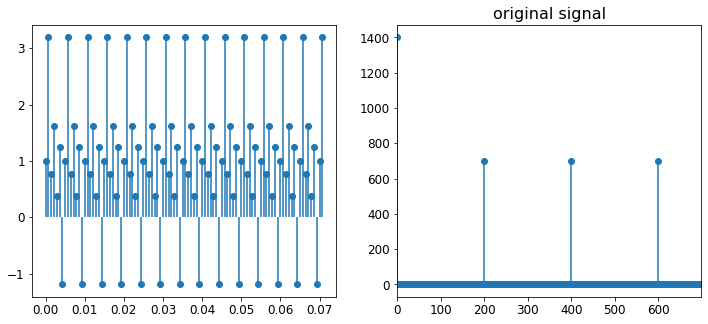

----------  k = 0   ----------


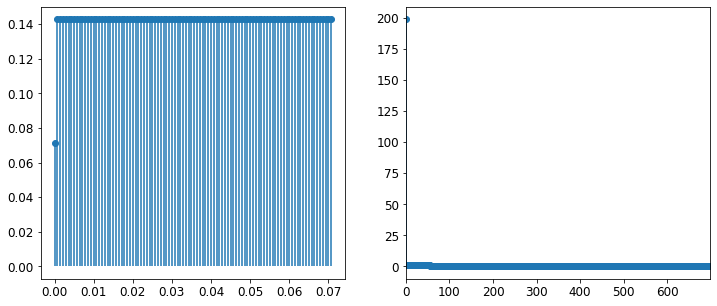

----------  k = 1   ----------


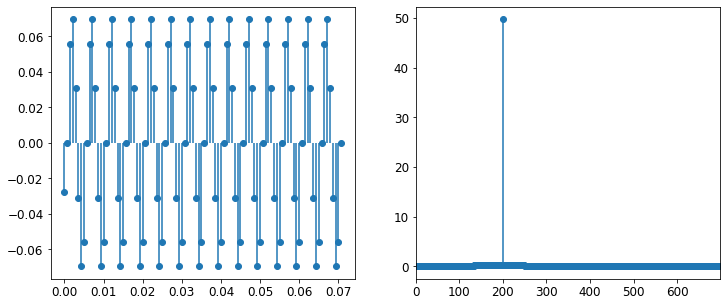

----------  k = 2   ----------


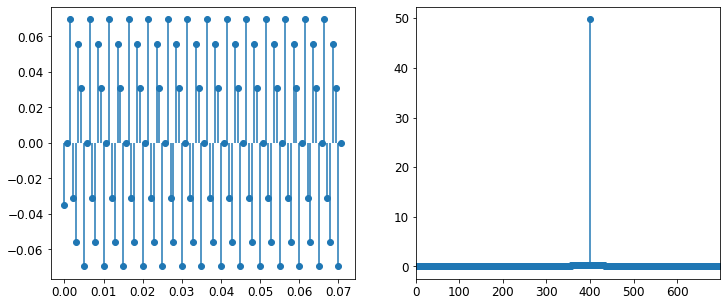

----------  k = 3   ----------


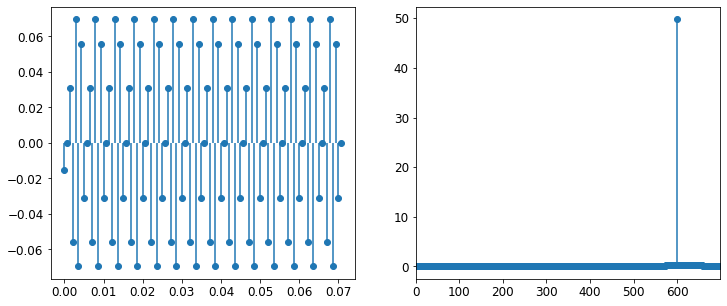

In [17]:
# -------------------------------------------------
# Generate input signal
# -------------------------------------------------

def multi_sin_func(t) :
    f1 = 200
    f2 = 400
    f3 = 600
    return np.sin(2*np.pi*f1*t) +  np.sin(2*np.pi*f2*t) +  np.sin(2*np.pi*f3*t) + 1
fs = 1400
t  = np.arange(0,1, 1/fs)
x  = multi_sin_func(t)

fft = np.fft.fft(x)
fftfreq = np.fft.fftfreq(len(fft), 1/fs)

plotSignalAndDft(t[0:100], x[0:100], fftfreq, np.abs(fft), title='original signal')

# -------------------------------------------------
# Define paramters
# -------------------------------------------------
h = np.array([1/14]*14)
M = 7 # OLD: M=4

z   = np.zeros((M,len(x)))
h_p = np.zeros(len(h)//M)

# -------------------------------------------------
# Before IDFT block
# -------------------------------------------------
for k in range(M) :
    h_p = h[k::M]
    h_p_bis = np.zeros(len(h_p)*M)
    h_p_bis[::M] = h_p
    
    x_bis = np.zeros(len(x))
    x_bis[:len(x)-k] = x[k:]
    z[k] = np.convolve(x_bis, h_p_bis, mode = 'same')
    
"""    
plt.stem(t,z[0])
plt.xlim(0,0.07)
plt.show()
"""

# -------------------------------------------------
# IDFT block
# -------------------------------------------------
for k in range(4) :
    som = np.zeros(len(z[0]), dtype='complex')
    for m in range(M):
        som += z[m] *np.exp(1j*2*np.pi*m*k/M)/M
        
    print('-'*10, ' k =', str(k), ' ', '-'*10)

    fft = np.fft.fft(np.real(som))
    freq = np.fft.fftfreq(len(som), 1/fs)

    plotSignalAndDft(t[0:100], np.real(som[0:100]), freq, np.abs(fft))

    plt.show()



<div class="alert alert-warning">
<b>FEEDBACK</b>  <br>

<b>Original signal </b>  <br>
<img src="FeedbackImgs/2-3_fig1.png" width = "600">
<br><br>
<b>Signals after filter bank ($\nu_k$ with k={0,1,2,3})</b>  <br>
We observe that each ouput signal $\nu_k$ is equivalent to a filtered version of the input by a pass-band filter. Parameters have been choosen to isolate each of the 3 original sine wave components of the signal.<br> 
<img src="FeedbackImgs/2-3_fig2.png" width = "600">
</div>

<font size=5 color=#009999> <i>2.3 (To go further - Optional) Analytical proof </i> </font>

<img src="Imgs/image_3.png" width ="500">

Show analytically that the implementation of the above figure is correct (i.e. that it implements a uniform filter bank) and explain why it is efficient in terms of complexity (compared to a direct implementation).

<div class="alert alert-warning">
<b>FEEDBACK</b>  <br><br>

1. <b> Show analytically that the implementation of the above figure is correct (i.e. that it implements a uniform filter bank) </b><br><br>

Let us decompose the prototype filter $H_0$ into $M$ polyphase components. In that case, the z transform of the prototype filter can be expressed as function of the z transforms of its polyphase components:

\begin{equation*}
    H_0(z) = \sum_{l=0}^{M-1}z^{-l}P_l(z^M)
\end{equation*}

where $P_l(z)$ is the z transform of the $l$th polyhase component: 

\begin{equation*}
    P_l(z) = \sum_{n=0}^{\infty} p_l(n)z^{-n} = \sum_{n=0}^{\infty} h_0(l+nM)z^{-n}, \; \; l=0,\dots,M-1
\end{equation*}

Recall also that $H_k(z)$ results from frequency shifting of $H_0(z)$, which in the z-plane corresponds to the rotation $z \rightarrow z e^{-j2\pi k/M}$. We can hence write:

\begin{align*}
    H_k(z) &= H_0(z e^{-j2\pi k/M}) \\
    &= \sum_{l=0}^{M-1}z^{-l}e^{j2\pi kl/M}P_l(z^Me^{-j2\pi kM/M})\\
    &= \sum_{l=0}^{M-1}z^{-l}e^{j2\pi kl/M}P_l(z^M)
\end{align*}

The z transform $V_k(z)$ of the $k$th output signal of the filter bank can be expressed as 

\begin{equation*}
    V_k(z) = H_k(z)X(z) = \Big(\sum_{l=0}^{M-1}z^{-l}e^{j2\pi kl/M}P_l(z^M) \Big) X(z)
\end{equation*}

By definition of the IDFT, one can observe that this last result is implemented by the operations of the proposed block scheme. (Note that the input gain $M$ cancels the factor $\frac{1}{M}$ of the IDFT).<br><br>

2. <b> Explain why it is efficient in terms of complexity (compared to a direct implementation).</b><br><br>

Assuming a prototype filter with $N$ coefficients and $M$ subbands, the uniform DFT filter bank requires:<br>

- $N.M$ multiplications for a direct implementation<br>

- $N+M.\log_2 M$ multiplications with the polyphase implementation ($N$ multiplications since the polyphase filter implements one FIR filter and $M.\log_2 M$ for the complexity of the IDFT is the Fast Fourier transform algorithm is employed).<br>

</div>